In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Creating a new column Family in the dataset by adding SibSp column and Parch column
df['Family']=df['SibSp']+df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
# Ticket-->As it is just a random number,we can skip this column from our analysis

In [5]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
#Based on the categories, we will analyze which category people were more likely to survive
##Low,Mid,Mid-High,High
df['Fare_Category']=pd.cut(df.Fare,bins=[0,7.9,14.45,31.00,512],
                           labels=['Low','Mid','Mid-High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [8]:
df[['Fare','Fare_Category']]# comparing the fair with fair category

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
5,8.4583,Mid
6,51.8625,High
7,21.0750,Mid-High
8,11.1333,Mid
9,30.0708,Mid-High


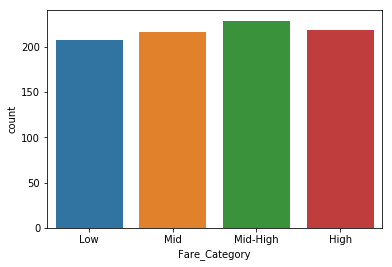

In [9]:
##Visualize the Fair Category
#Countplot give you entire count of a category-->categories of survived and Deceased
sns.countplot(x='Fare_Category',data=df)

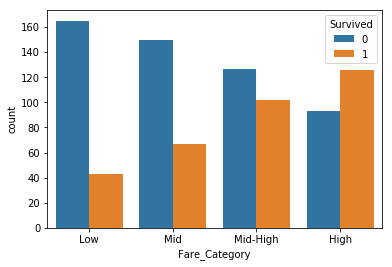

In [10]:
##Visualizing the count of categories based on Survived
sns.countplot(x='Fare_Category',hue='Survived',data=df)

Text(0.5, 1.0, 'Survival based on Fare Category')

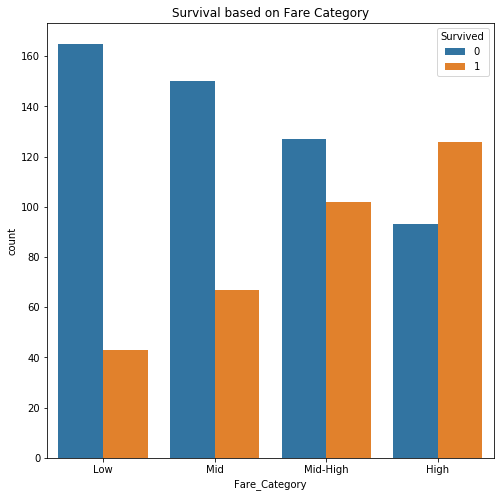

In [11]:
##Visualizing the count of categories based on Survived
plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data=df).set_title('Survival based on Fare Category')

Text(0.5, 1.0, 'Survival based on Fare Category')

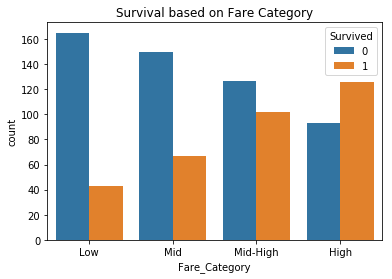

In [12]:
##Visualizing the count of categories based on Survived
#plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data=df).set_title('Survival based on Fare Category')

In [13]:
##embarked:part-->from which the passenger had boarded the snip
df.Embarked.value_counts()#Out of 100% passengers,which port has taken more %

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

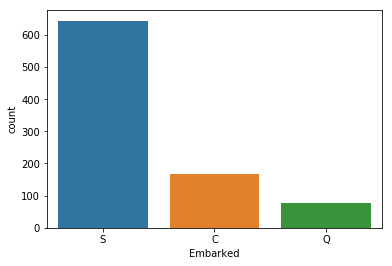

In [15]:
##Visualizing the port column
sns.countplot(x='Embarked',data=df)

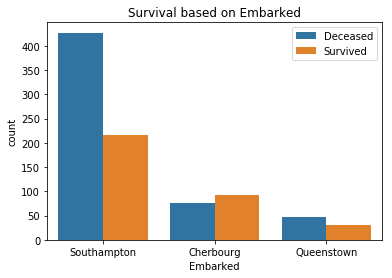

In [16]:
##Visualizing the port column
p=sns.countplot(x='Embarked',hue='Survived',data=df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])

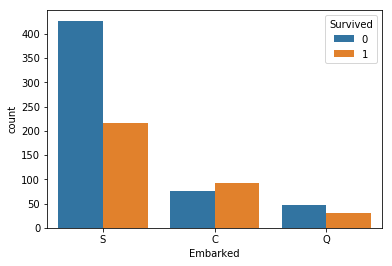

In [17]:
##Visualizing the port column
sns.countplot(x='Embarked',hue='Survived',data=df)

## Imputing the Cabin column

In [18]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [19]:
##Cabin-->77% missing values,we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [20]:
df.Cabin.isnull().sum()

0

## Imputing the Age Column

In [21]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [22]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
#Median-->Sorting in the order(middle value) NaN in the age column should be substituted with median of age 
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [24]:
##Imputing the Embarked Column --<Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [25]:
#Imputing the Fare ategory column
df.Fare_Category.isnull().sum()

18

In [26]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

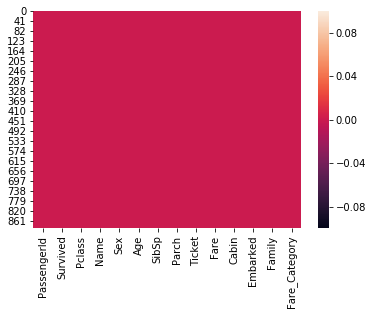

In [28]:
sns.heatmap(df.isnull())

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [30]:
df['Age-Range']=pd.cut(df.Age,[0.10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20.0, 30.0]"
1,38.0,"(30.0, 40.0]"
2,26.0,"(20.0, 30.0]"
3,35.0,"(30.0, 40.0]"
4,35.0,"(30.0, 40.0]"


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30.0, 40.0]"


In [32]:
#when we are creating dummy columns,we need to drop one dummy -->it leads to a situation called as Dummy Variable trap
dummy_set=pd.get_dummies(df.Fare_Category,drop_first=True)

In [33]:
df=pd.concat([df,dummy_set],axis=1)

In [34]:
##Encoding of Categorical Vaiables/columns
df=pd.concat([df,pd.get_dummies(df.Cabin, prefix='Cabin',drop_first=True),
              pd.get_dummies(df.Embarked, prefix='Emb',drop_first=True),
              pd.get_dummies(df.Fare_Category,prefix='Face',drop_first=True),
              pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_T,Emb_Q,Emb_S,Face_Mid,Face_Mid-High,Face_High,"(20.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,1,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,1,0,0,0,1,0,0


In [35]:
#LabelEncoder--->0,1,2,3,4,....(How many categories are present in the columns,that many numbers we will get)
#OneHotEncoder--->it will create dummy columns for each and every category

In [36]:
##Encoding  the Sex Column with LabelEncoding
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df.Sex)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_T,Emb_Q,Emb_S,Face_Mid,Face_Mid-High,Face_High,"(20.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,...,0,0,1,0,0,0,1,0,0,0


In [37]:
df.columns

Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
             'Cabin_T',         'Emb_Q',         'Emb_S',      'Face_Mid',
       'Face_Mid-High',     'Face_High',    (20.0, 30.0],    (30.0, 40.0],
          (40.0, 60.0],    (60.0, 80.0]],
      dtype='object', length=174)

In [38]:
#drop the unnecessary colums
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Cabin','Age-Range'],
        axis=1,inplace=True)
df.shape

(891, 163)

In [39]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_T,Emb_Q,Emb_S,Face_Mid,Face_Mid-High,Face_High,"(20.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]"
0,0,3,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [40]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int32
Family           int64
Mid              uint8
Mid-High         uint8
High             uint8
Cabin_A14        uint8
Cabin_A16        uint8
Cabin_A19        uint8
Cabin_A20        uint8
Cabin_A23        uint8
Cabin_A24        uint8
Cabin_A26        uint8
Cabin_A31        uint8
Cabin_A32        uint8
Cabin_A34        uint8
Cabin_A36        uint8
Cabin_A5         uint8
Cabin_A6         uint8
Cabin_A7         uint8
Cabin_B101       uint8
Cabin_B102       uint8
Cabin_B18        uint8
Cabin_B19        uint8
Cabin_B20        uint8
Cabin_B22        uint8
Cabin_B28        uint8
Cabin_B3         uint8
Cabin_B30        uint8
                 ...  
Cabin_E40        uint8
Cabin_E44        uint8
Cabin_E46        uint8
Cabin_E49        uint8
Cabin_E50        uint8
Cabin_E58        uint8
Cabin_E63        uint8
Cabin_E67        uint8
Cabin_E68        uint8
Cabin_E77        uint8
Cabin_E8         uint8
Cabin_F E69      uint8
Cabin_F G63

## StandardScaler-->not required for this (DistanceBased Algorithms)

In [41]:
##Seperating the Input and Output Data, dropping the survived column from the data 
X=df.drop('Survived',axis=1)
X.shape

(891, 162)

In [42]:
#Output Column
y=df.iloc[:,0]
y.shape

(891,)

In [43]:
##Input and Output into training data and testing data
###Training-->we will be training the model on taining data
###Testing-->check the performance of the model
###891-->out of 891,75% of 891 rows will be in training dataset and 25% of rows will be in testing data 

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1) #random _state

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 162)
(223, 162)
(668,)
(223,)


In [46]:
X_train
#when u run this code the rows keep on changing so to keep it contant we used the random_state in the above code

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_T,Emb_Q,Emb_S,Face_Mid,Face_Mid-High,Face_High,"(20.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]"
35,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
46,3,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
453,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
291,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
748,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
41,2,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
224,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
340,2,1,2,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
125,3,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
803,3,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
#to check how many rows will be displayed by default
pd.get_option('display.max_rows')

60

In [48]:
##to display all the columns in the data frame we have to use set_option displaymax_columns to none (none is unlimited)
pd.set_option('display.max_columns',None)

In [49]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Face_Mid,Face_Mid-High,Face_High,"(20.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]"
0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
5,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0
6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
7,0,3,1,4,0,1,0,0,0,0,0,0,0,

In [50]:
pd.reset_option('display.max_columns')

In [51]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_T,Emb_Q,Emb_S,Face_Mid,Face_Mid-High,Face_High,"(20.0, 30.0]","(30.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]"
0,0,3,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5,0,3,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
6,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7,0,3,1,4,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
8,1,3,0,2,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
9,1,2,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## For classification:we are classifying weather the passenger is survived or not logistic regression:

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression() # creating an object for logistic regression

## dataset is of 100% --891 rows
* 891 rows-- 2 parts
* Training data (subset of original data)(800 rows, we have in training data)
* We should build the model on training data
* Testing data(subset of our original data)(91 rows, we will test the model performance on 91 rows)

In [53]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#we have to apply this object(log_reg)to the training data
log_reg.fit(X_train,y_train)#with help of fit method we are fitting the logistic regression on training data
##objectName.fit(inputdata,outputdata)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
#the above output says that logistic regression has been fitted in to the training data

## instead of directly predicting on test data let us see how will the model predicts the training data

In [55]:
#predicting on the training data
##syntax:objectName.predict(input)#displays the output
y_train_pred=log_reg.predict(X_train)#o and 1 will be displayed as the output
y_train_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [56]:
y_train==y_train_pred

35      True
46      True
453     True
291     True
748     True
41     False
224     True
340     True
125    False
803    False
800     True
108     True
578    False
888     True
593     True
550     True
0       True
684     True
529     True
244     True
74     False
160     True
744    False
66      True
576     True
736     True
412     True
761     True
510    False
741     True
       ...  
86      True
478     True
503    False
753     True
215     True
580     True
562     True
398     True
668     True
490     True
252     True
468     True
357    False
254     True
276     True
178     True
281     True
390     True
508     True
749     True
583    False
129     True
144     True
847     True
645     True
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [57]:
## accuracy_score-->with the help of this we can evalute the overall performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8398203592814372

## Performance metrics-->to evalue the model is predicting

In [58]:
#predict the model on test
y_test_pred=log_reg.predict(X_test)

In [59]:
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [60]:
y_test==y_test_pred

862     True
223     True
84      True
680    False
535     True
623     True
148     True
3       True
34      True
241     True
794     True
2       True
6       True
17     False
368     True
430    False
819     True
743     True
189     True
437    False
382     True
73      True
710     True
385     True
111    False
821    False
742     True
865     True
619     True
708     True
       ...  
875     True
852    False
61      True
277     True
427     True
676     True
493     True
433     True
571     True
773     True
135     True
248    False
345     True
765     True
134     True
507    False
104     True
218     True
850     True
57      True
731     True
543    False
614     True
411     True
307     True
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [61]:
##accuracy of the test data(original test data and the model predicted output)
accuracy_score(y_test,y_test_pred)

0.7802690582959642

In [62]:
## for training data--we got an accuracy of 84
## for testing data-- we got an accuracy of 77%

Documentation Link:https://docs.google.com/document/d/10ok7JVYcmbkLA4FT814RAIWgU4x8TiP-iNwxBhiHl10/edit?usp=sharing